# Set environment

In [ ]:
# # http://pytorch.org/
# from os.path import exists
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [ ]:
# !git clone https://github.com/gilbertolem/ProgGen

In [ ]:
# from os import chdir, getcwd
# chdir("ProgGen")
# from sys import path
# path.append(getcwd())

# Train

In [1]:
import torch
import utils.data_tools as data_tools
from utils.nets import ProgGen_RNN
from pickle import load, dump
import matplotlib.pyplot as plt

xml_directory = "XML_Tunes/"
torch.manual_seed(999)
use_gpu = torch.cuda.is_available()

In [2]:
# Load vocabulary
words_text2num = load(open("maps/words_text2num.txt",'rb'))
vocab_size = len(words_text2num)

# Create training data
filters = {'author':'Charlie Parker', 'style':None}
X_train, X_val = data_tools.musicxml2tensor(xml_directory, words_text2num, filters = filters) # (Seq x Batch x vocab_size)
train_data = data_tools.TuneData(X_train)
val_data = data_tools.TuneData(X_val)


CREATING TENSORS FROM MUSICXML FILES...
	297 tunes succesfully loaded for training.
	75 tunes succesfully loaded for validation.


In [3]:
# Construct Neural Net
embed_size = 100
hidden_size = 256
num_layers = 1
dropout = 0
bidirectional = True
rnn_type = 'lstm'
model = ProgGen_RNN(rnn_type, vocab_size, embed_size, hidden_size, num_layers, dropout, bidirectional)
loss_fn = torch.nn.CrossEntropyLoss()

# Define loader
sampler = torch.utils.data.RandomSampler(train_data)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 372, sampler = sampler, num_workers = 1 if use_gpu else 4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 372, num_workers = 1 if use_gpu else 4)

if use_gpu:
    model = model.cuda()
    loss_fn = loss_fn.cuda()

In [4]:
# Define loss function and optimizer
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [5]:
from utils.training import train
epochs = 500
losses = train(epochs, model, optim, train_loader, val_loader, loss_fn, use_gpu)


--------------------------------------------------------------------
TRAINING MODEL... 

   Epoch | Training Loss | Val. Loss
       0 |          5.56 |      3.31
       1 |          3.31 |       3.4
       2 |           3.4 |      2.77
       3 |          2.77 |      2.53
       4 |          2.52 |      2.51
       5 |          2.51 |       2.4
       6 |           2.4 |      2.25
       7 |          2.25 |      2.13
       8 |          2.13 |      2.04
       9 |          2.04 |      1.96
      10 |          1.96 |      1.91
      11 |          1.91 |      1.87
      12 |          1.87 |      1.84
      13 |          1.83 |       1.8
      14 |           1.8 |      1.76
      15 |          1.77 |      1.72
      16 |          1.72 |      1.68
      17 |          1.68 |      1.64
      18 |          1.65 |      1.61
      19 |          1.62 |      1.58
      20 |          1.58 |      1.56
      21 |          1.55 |      1.53
      22 |          1.53 |      1.51
      23 |          1.

     218 |          0.78 |      0.75
     219 |          0.78 |      0.76
     220 |          0.77 |      0.77
     221 |          0.78 |      0.77
     222 |          0.76 |      0.78
     223 |          0.77 |      0.78
     224 |          0.75 |      0.77
     225 |          0.77 |      0.76
     226 |          0.75 |      0.76
     227 |          0.78 |      0.75
     228 |          0.75 |      0.75
     229 |          0.75 |      0.74
     230 |          0.73 |      0.74
     231 |          0.73 |      0.74
     232 |          0.73 |      0.74
     233 |          0.72 |      0.73
     234 |          0.73 |      0.73
     235 |          0.73 |      0.74
     236 |          0.73 |      0.74
     237 |          0.74 |      0.73
     238 |          0.74 |      0.73
     239 |          0.73 |      0.73
     240 |          0.73 |      0.73
     241 |          0.73 |      0.74
     242 |          0.74 |      0.74
     243 |          0.73 |      0.72
     244 |          0.72 |      0.72
 

     440 |          0.61 |      0.64
     441 |          0.63 |      0.64
     442 |          0.62 |      0.62
     443 |           0.6 |      0.62
     444 |          0.61 |      0.61
     445 |          0.62 |      0.62
     446 |          0.62 |      0.62
     447 |          0.64 |      0.62
     448 |          0.63 |      0.62
     449 |          0.62 |      0.62
     450 |          0.62 |      0.62
     451 |          0.61 |      0.62
     452 |          0.61 |      0.61
     453 |          0.62 |      0.61
     454 |          0.61 |      0.61
     455 |          0.63 |      0.61
     456 |           0.6 |      0.61
     457 |          0.61 |      0.61
     458 |          0.62 |      0.61
     459 |          0.61 |      0.61
     460 |           0.6 |      0.61
     461 |           0.6 |      0.61
     462 |          0.61 |      0.61
     463 |          0.61 |      0.61
     464 |          0.62 |      0.61
     465 |          0.61 |      0.61
     466 |          0.59 |      0.61
 

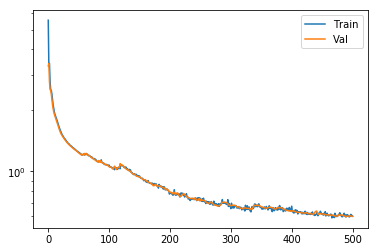

0.601128876209259
0.6003854870796204
0.6082302331924438
0.5991564989089966


In [6]:
plt.semilogy(losses[0], label='Train')
plt.semilogy(losses[1], label='Val')
plt.legend()
plt.show()
import numpy as np
print(losses[0][-1])
print(losses[1][-1])
idx = np.argmin(losses[1])
print(losses[0][idx])
print(losses[1][idx])

# Generate something

In [ ]:
from utils.generating import generate_progression

model_name = "model"
initial_chord = "4C_maj"
tune_len = 32
top = 10

prog = generate_progression(initial_chord, tune_len, top, model_name, verbose = False)
print("Generated Progression:\n")
print(prog)